In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import patches

import os

#### • Load existing annotation.txt file


In [3]:
train = pd.read_csv("annotations.txt", names=['filename', 'xmin','ymin','xmax','ymax','classes'])
train.head(5)

,filename,xmin,ymin,xmax,ymax,classes
0,food_data\cake\106496.jpg,164,29,487,323,cake
1,food_data\cake\106501.jpg,42,259,251,465,cake
2,food_data\cake\106501.jpg,139,120,307,298,cake
3,food_data\cake\110954.jpg,15,80,367,460,cake
4,food_data\cake\110954.jpg,1,82,111,288,cake


####  • Current paperspace path format

In [6]:
os.getcwd()

'/home/paperspace/Desktop/food-detection-frcnn'


#### • Run only once to modify path according to paperspace

In [8]:
train.filename = train['filename'].apply(lambda x: os.path.join(os.getcwd(), x).replace('\\','/'))
train.head(5)

,filename,xmin,ymin,xmax,ymax,classes
0,/home/paperspace/Desktop/food-detection-frcnn/...,164,29,487,323,cake
1,/home/paperspace/Desktop/food-detection-frcnn/...,42,259,251,465,cake
2,/home/paperspace/Desktop/food-detection-frcnn/...,139,120,307,298,cake
3,/home/paperspace/Desktop/food-detection-frcnn/...,15,80,367,460,cake
4,/home/paperspace/Desktop/food-detection-frcnn/...,1,82,111,288,cake


In [10]:
train.filename[0]

'/home/paperspace/Desktop/food-detection-frcnn/food_data/cake/106496.jpg'

In [11]:
train['classes'].value_counts()

cake      439
donuts    218
dosa      119
Name: classes, dtype: int64

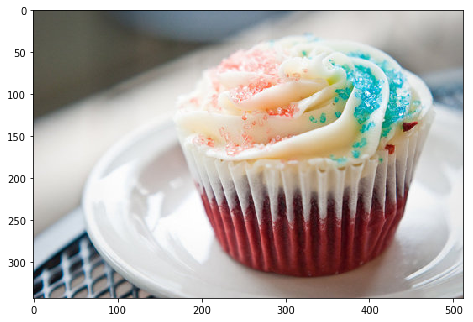

In [55]:
fig = plt.figure()
import numpy as np
#add axes to the image
ax = fig.add_axes([0,0,1,1])
image = plt.imread(train.filename[0])
plt.imshow(image)

##### • Concatenating all fields from train df to single df
##### • Download df_txt as annotation.txt

In [12]:
data = pd.DataFrame()
data['format'] = train['filename']

# add xmin, ymin, xmax, ymax and class as per the format required
for i in range(data.shape[0]):
    data['format'][i] = data['format'][i] + ',' + str(train['xmin'][i]) + ',' + str(train['ymin'][i]) + ',' + str(train['xmax'][i]) + ',' + str(train['ymax'][i]) + ',' + train['classes'][i]

data.to_csv('annotations.txt', header=None, index=None, sep=' ')